# Non Linear Regression

1. When the data shows curvy trends, linear regression will not produce very acurate results compared to the non linear regression, because as the name implies, linear regression presumes that the data is linear. 

2. In this module we will learn about non linear regression and where all it is used, using some simple examples.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1. We remember that in case of linear regression, we had an independent and a dependent variale and we had a simple equation that modeled the data between them.
                for example - y = 2x + 3

[]

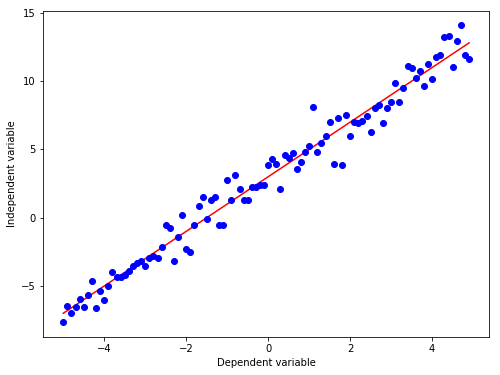

In [16]:
# Here, i am going to show the line of fit on some random numpy data.
x = np.arange(-5.0,5.0,0.1)
y = 2*(x)+3

# We get the y_noise using gaussian distribution to drift the values a bit from the line of fit.
y_data = y + np.random.normal(size=x.size)
plt.figure(figsize=(8,6))
plt.plot(x,y,'r')
plt.plot(x,y_data,'bo')
plt.xlabel('Dependent variable')
plt.ylabel('Independent variable')
plt.plot()

1. Non linear relations between the dependent and the independent variables are usually a result of the modeled curve we get. But usually, we define a non linear curve as the one when the derivative of the equation with respect to any parameter results in a parameter. Usually the logarithmic functions etc come under this one.

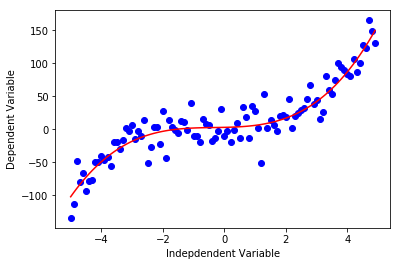

In [18]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Quadratic function

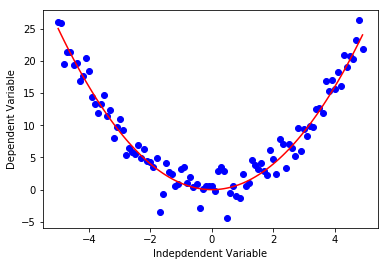

In [19]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Exponential function

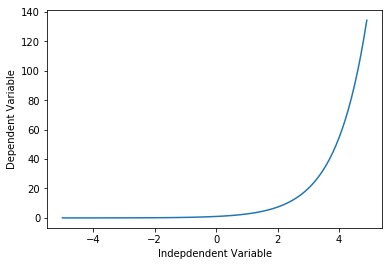

In [20]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Logarithmic function

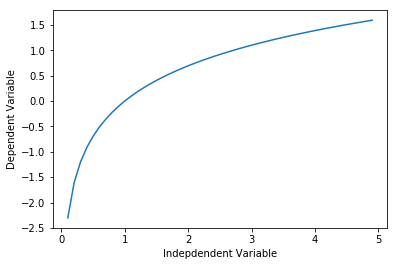

In [23]:
X = np.arange(0.1, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Sigmoidal/Logistic function

 y = a + (b/(1+c*(X-d))


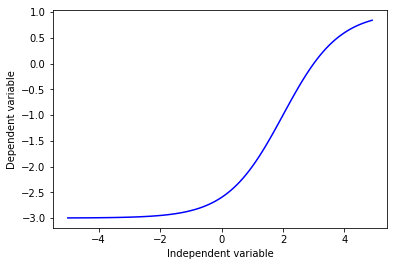

In [25]:
x = np.arange(-5.0,5.0,0.1)
y = 1 - (4/(1+np.power(3,x-2)))
plt.plot(x,y,color='b')
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.show()

#### The above examples showed a number of function relating to the non linear regression functions. We will now apply non linear regression on the china GDP dataset

In [27]:
import numpy as np
import pandas as pd

!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv

df = pd.read_csv('china_gdp.csv')
df.head()

2019-10-26 20:01:44 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


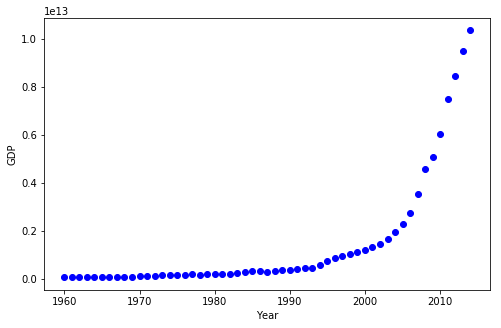

In [30]:
# Now lets plot the data and see wht trends the data gives.
plt.figure(figsize=(8,5))
x_data,y_data = (df['Year'].values,df['Value'].values)
plt.plot(x_data,y_data,"bo")
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

# This gives us a clear idea that this will be non linear regression.

### Choosing the model

1. From an initial look at the plot, we determine the logistic regression could be a good approximation, since it has the property of starting with slow growth, then increase in middle and then sligh decrease at the end.

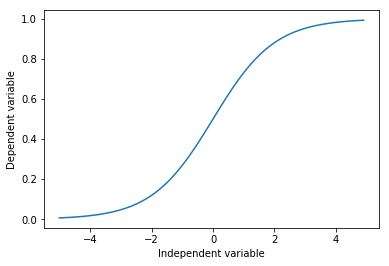

In [32]:
x = np.arange(-5.0,5.0,0.1)
y = 1.0/(1.0 + np.exp(-x))

plt.plot(x,y)
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

The formula for the logistic function is the following:

                                    𝑌̂ =1/(1+𝑒𝛽1(𝑋−𝛽2))
                                    
𝛽1 : Controls the curve's steepness,
𝛽2 : Slides the curve on the x-axis.


In [33]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

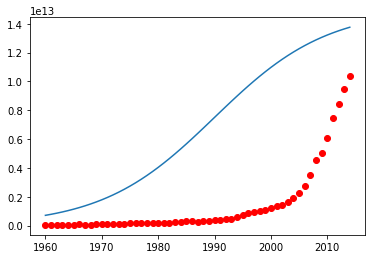

In [34]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [36]:
# Better, we normalize the data
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)
print(xdata,ydata)
print(x_data,y_data)

[0.97318769 0.97368421 0.97418073 0.97467726 0.97517378 0.97567031
 0.97616683 0.97666336 0.97715988 0.97765641 0.97815293 0.97864945
 0.97914598 0.9796425  0.98013903 0.98063555 0.98113208 0.9816286
 0.98212512 0.98262165 0.98311817 0.9836147  0.98411122 0.98460775
 0.98510427 0.98560079 0.98609732 0.98659384 0.98709037 0.98758689
 0.98808342 0.98857994 0.98907646 0.98957299 0.99006951 0.99056604
 0.99106256 0.99155909 0.99205561 0.99255214 0.99304866 0.99354518
 0.99404171 0.99453823 0.99503476 0.99553128 0.99602781 0.99652433
 0.99702085 0.99751738 0.9980139  0.99851043 0.99900695 0.99950348
 1.        ] [0.0057156  0.00478589 0.00450854 0.00483806 0.00570384 0.00673204
 0.00732793 0.00695878 0.0067595  0.00760213 0.00883705 0.00951846
 0.01083164 0.01320831 0.01373801 0.01556399 0.01464318 0.01664431
 0.01432975 0.01707961 0.01831512 0.01877086 0.01965745 0.02211047
 0.02492384 0.02969431 0.02885665 0.02620514 0.03000746 0.03341025
 0.03466722 0.03683833 0.04103727 0.04276985 0.054

 beta_1 = 690.453017, beta_2 = 0.997207


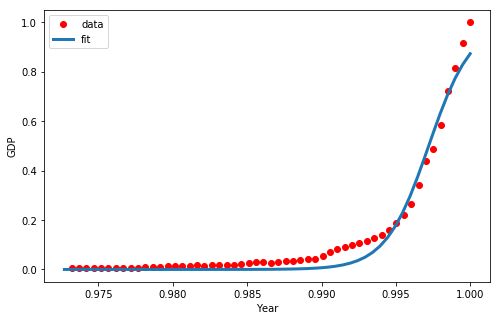

In [42]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata) 
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

x = np.linspace(1960, 2015, 55) # start stop now, separated by 50 years.
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()


In [40]:
# Evaluation
    
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )


Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.97


##### This was all about non linear regression